# ***Analisis de sonido***

Andres Felipe Parra Quiroga


In [149]:
# Importar librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import IPython as ip
from scipy.io import wavfile as fil

Creacion de sonido sintetico:

In [118]:
# Declarar tiempo como funcion para ver el arreglo completo (8000)
muestras = 8000
tiempo = np.linspace(0,1,8000)
print("Lista:",tiempo)
print("")
print("Longitud de lista:", len(tiempo))

Lista: [0.00000000e+00 1.25015627e-04 2.50031254e-04 ... 9.99749969e-01
 9.99874984e-01 1.00000000e+00]

Longitud de lista: 8000


In [119]:
# Generar la grafica con la frecuencia deseada

f = 220
y = np.sin(2 * np.pi * tiempo * f)

Grafica de la onda sonora:

<function matplotlib.pyplot.show(close=None, block=None)>

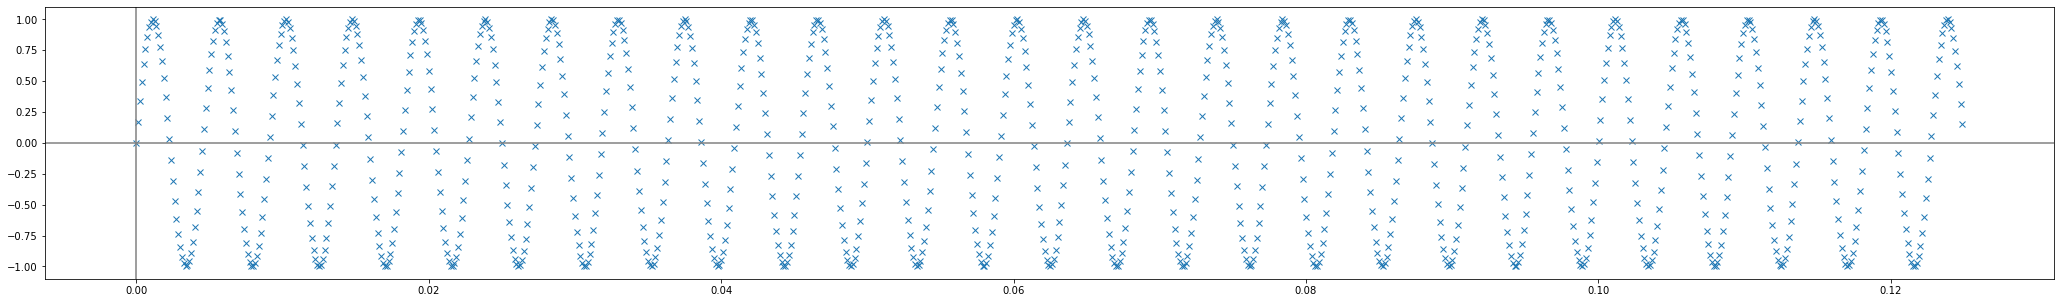

In [142]:
# Graficar el sonido (se da un rango de 0 a 1000 por temas de visibilidad)

plt.figure(figsize=(36,5))
plt.plot(tiempo[0:1000], y[0:1000] ,'x')
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show

Sonido de la onda :

In [121]:
# Muestra de sonido
print("")
ip.display.Audio(data=y, rate=muestras)

Crearemos la matriz para la $\mathrm{DF}$ de tamaño $8000 \times 8000$

In [122]:
# Crear la matriz de ceros del tamaño de las muestras (8000x8000)

df = np.zeros((muestras, muestras), dtype=complex)

In [132]:
# Declaracion del valor de Omega (w)


theta = 2 * np.pi / muestras
omega = np.exp(1j*theta)
escalar = 1 / np.sqrt(muestras)

In [133]:
#Llenar dft con los valores para que sea una matriz de fourier

for fila in range(muestras):
    for columna in range(muestras):
        df[fila][columna] = omega ** (fila*columna)

In [134]:
# Multiplicar la matriz por el escalar

df = escalar * df

Vamos a multiplicar la mastriz $\mathrm{DF}$ por el vector $y$

In [135]:
dft = df @ y

Calcular el modulo al cuadrado de cada componente del vector $\mathrm{DFT}$

In [136]:
# Calcular el modulo

espectograma = np.abs(dft) ** 2

<function matplotlib.pyplot.show(close=None, block=None)>

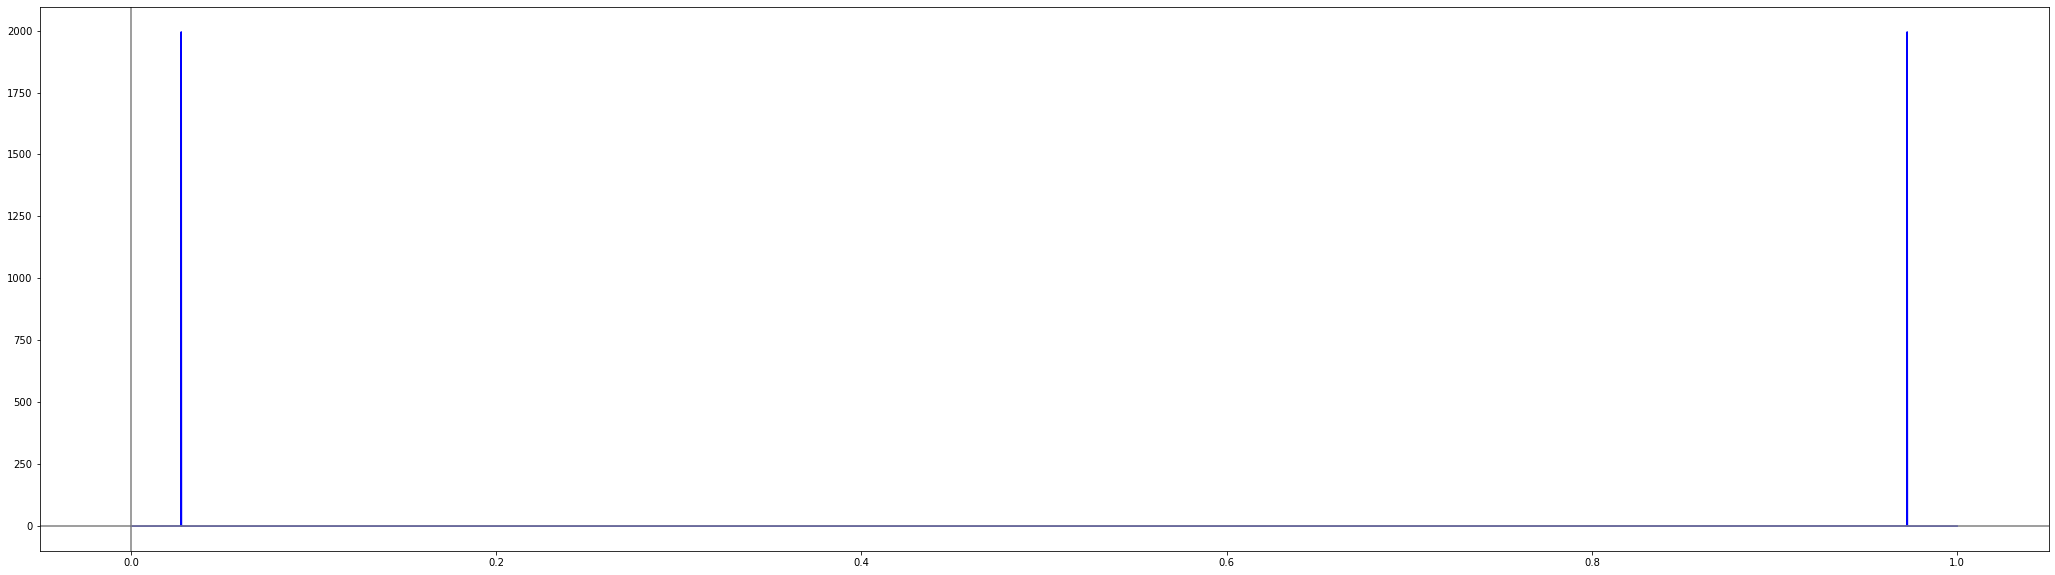

In [137]:
# Graficar el espectograma (se da un rango de 0 a 1000 por temas de visibilidad)

plt.figure(figsize=(36,10))
plt.plot(tiempo, espectograma ,'b')
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show

In [138]:
ordenado = np.sort(espectograma)
print(ordenado)

[1.19495019e-27 2.56926384e-09 2.56926384e-09 ... 1.60276395e+00
 1.99477715e+03 1.99477715e+03]


In [139]:
for i in range(50):
    frecuencia = np.where(espectograma == ordenado[-i])[0][0]
    if frecuencia < 600:
        print("frecuencia en",str(i)+":",frecuencia)

frecuencia en 0: 0
frecuencia en 2: 220
frecuencia en 4: 221
frecuencia en 6: 219
frecuencia en 8: 222
frecuencia en 10: 218
frecuencia en 12: 223
frecuencia en 14: 217
frecuencia en 16: 224
frecuencia en 18: 216
frecuencia en 20: 225
frecuencia en 22: 215
frecuencia en 24: 226
frecuencia en 26: 214
frecuencia en 28: 227
frecuencia en 30: 213
frecuencia en 32: 228
frecuencia en 34: 212
frecuencia en 36: 229
frecuencia en 38: 211
frecuencia en 40: 230
frecuencia en 42: 210
frecuencia en 44: 231
frecuencia en 46: 209
frecuencia en 48: 232


In [140]:
np.save('df.npy', df)

## Prueba con sonido real

In [166]:
# Nombre del archivo descargado en la misma ruta
filename = 'tin_whistle.wav'

In [167]:
ip.display.Audio(filename)

In [168]:
samplerate, data = fil.read(filename)

In [169]:
transformada = df@data[0:8000]
espectograma01 = np.abs(transformada) ** 2

<function matplotlib.pyplot.show(close=None, block=None)>

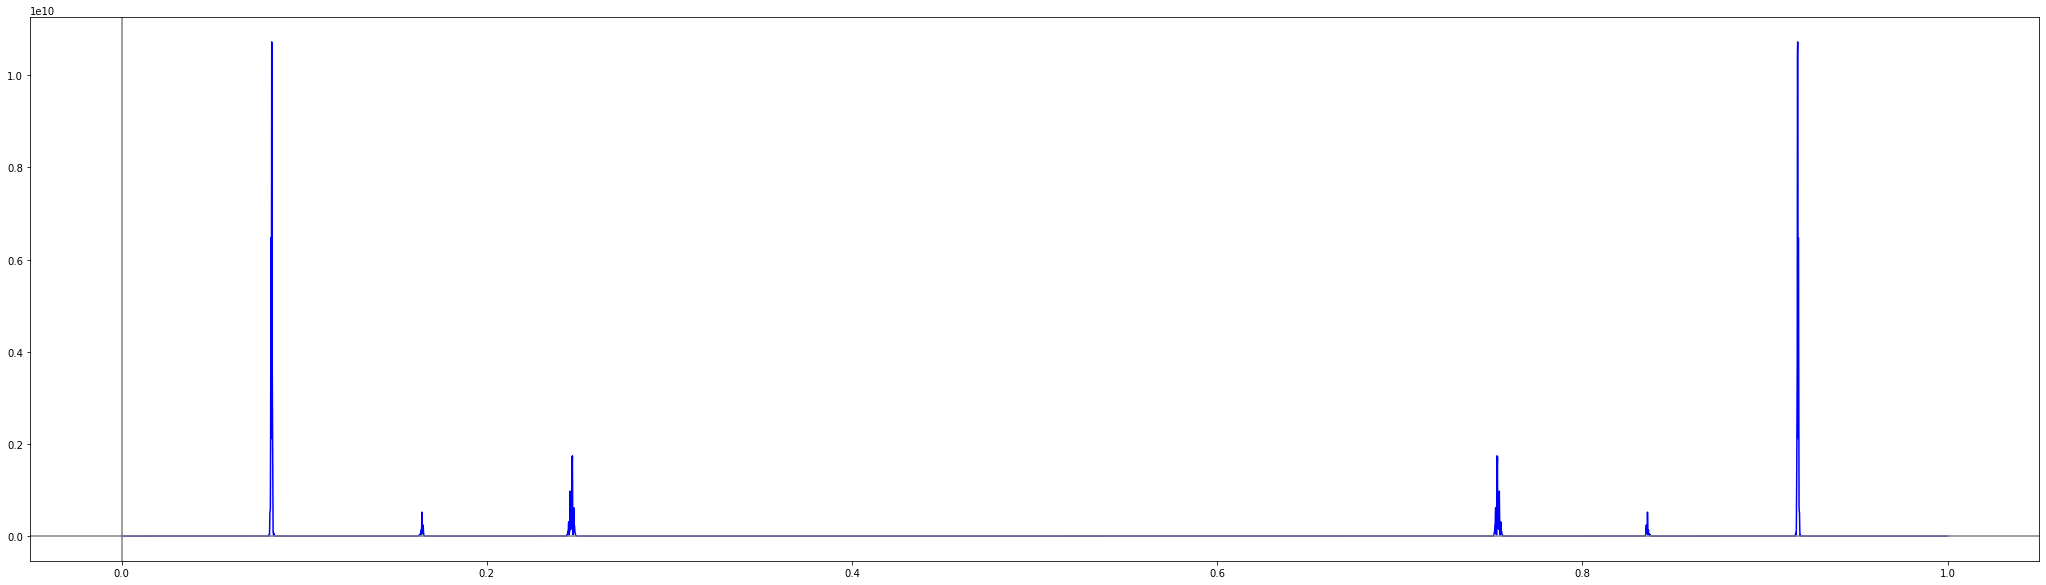

In [170]:
# Graficar el espectograma (se da un rango de 0 a 1000 por temas de visibilidad)

plt.figure(figsize=(36,10))
plt.plot(tiempo, espectograma01 ,'b')
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.show